# Data Science Packages Processing

This first notebook pre-process all README from a list of Data Science packages and output cleaned dataset that can be input to other tasks (e.g Clustering, Classification)

## Import libraries

In [58]:
import json
import subprocess
import enchant

import pandas as pd
import spacy

from pathlib import Path

from tqdm import tqdm

In [59]:
# The installation doesn’t automatically download the English model.
try:
    subprocess.run(
        f"pipenv run python3 -m spacy download en",
        shell=True,
    )

except Exception as e :
    print(f"Could not enter environment {e}")

try:
    _NLP_SPACY = spacy.load("en")
except Exception as load_model:
    print(load_model)

In [60]:
# Introduce the US vocabulary
US_VOCABULARY = enchant.Dict("en_US")

In [61]:
current_path = Path.cwd().parents[0]
raw_data_path = current_path.joinpath("data/raw")
raw_data_file_path = raw_data_path.joinpath("hundreds_data_science_packages_initial_dataset.json")

with open(raw_data_file_path, "r") as retrieved_file:
    raw_files = json.load(retrieved_file)

data_science_readmes_pd = pd.DataFrame(raw_files).transpose()
data_science_readmes_pd
data_science_readmes_pd.rename(columns={"file_name": "project_org_readme", "raw_text": "raw_text"})

,project_org_readme,raw_text
alibi,SeldonIO/alibi/README.md,"<p align=""center"">\n <img src=""doc/source/_st..."
altair,altair-viz/altair/README.md,"# Altair <a href=""https://altair-viz.github.io..."
ax-platform,facebook/Ax/README.md,"<img width=""300"" src=""website/static/img/ax_lo..."
arviz,arviz-devs/arviz/README.md,"<img src=""https://arviz-devs.github.io/arviz/_..."
autogluon,awslabs/autogluon/README.md,"\n\n<div align=""left"">\n <img src=""https://us..."
...,...,...
vincent,wrobstory/vincent/README.md,# Status\n\n#### 2016-06-18 Update\n\nIf you a...
voila,voila-dashboards/voila/README.md,# ![voila](docs/source/voila-logo.svg)\n\n[![D...
word2vec,danielfrg/word2vec/README.md,word2vec\n========\n\n[![travis-ci](https://ap...
xgboost,dmlc/xgboost/README.md,<img src=https://raw.githubusercontent.com/dml...


In [62]:
external_data_path = current_path.joinpath("data/external")
# Retrieve list of common words for normalization
with open(f"{external_data_path}/common_words.txt", "r") as retrieved_file:
    common_words_txt = retrieved_file.read()

common_words = [word for word in common_words_txt.split("\n")]
print(f"Common words... \n{common_words}")

Common words... 
['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'b', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'c', 'can', "can't", 'cannot', 'cc', 'come', 'could', "couldn't", 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'easy', 'en', 'etc', 'few', 'for', 'from', 'full', 'further', 'get', 'go', 'good', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'inc', 'instead', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'many', 'me', 'more', 'most', "mustn't", 'my', 'myself', 'need', 'new', 'no', 'non', 'nor', 'not', 'obviously', 'of', 'off', 'old', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'o

In [68]:
# Retrieve list of common words for normalization
with open(f"{external_data_path}/specific_common_words.txt", "r") as retrieved_file:
    specific_common_words_txt = retrieved_file.read()

specific_common_words = [word for word in specific_common_words_txt.split("\n")]
print(f"Specific Common words... \n{specific_common_words}")

Specific Common words... 
['abbr', 'additional', 'alt', 'amazon', 'application', 'available', 'binary', 'bug', 'citation', 'chat', 'check', 'cite', 'class', 'code', 'command', 'community', 'consider', 'contribute', 'contribution', 'datum', 'dependency', 'directory', 'detail', 'developer', 'development', 'distribution', 'doc', 'docs', 'document', 'documentation', 'environment', 'example', 'file', 'first', 'google', 'git', 'ids', 'implementation', 'import', 'include', 'instance', 'instances', 'installation', 'interface', 'issue', 'items', 'last', 'late', 'learn', 'library', 'license', 'like', 'ls', 'main', 'may', 'module', 'names', 'model', 'node', 'object', 'one', 'page', 'path', 'pip', 'package', 'parameter', 'please', 'project', 'python', 'release', 'repository', 'request', 'requirement', 'result', 'see', 'self', 'server', 'service', 'sh', 'software', 'source', 'status', 'system', 'target', 'type', 'tool', 'tutorial', 'usage', 'user', 'value', 'version', 'via', 'way', 'website', 'well

In [65]:
# Retrieve list of non-character word for normalization
with open(f"{external_data_path}/non_character_words.txt", "r") as retrieved_file:
    non_characerter_words_txt = retrieved_file.read()

non_characerter_words = [word for word in non_characerter_words_txt.split("\n")]
print(f"Non character words... \n{non_characerter_words}")

Non character words... 
['!', '?', ',', ':', "'", '’', '“', '”', '.', '=', '[', ']', '#', ';', '...', '"', '{', '}', '``', '-', '/', '|', '@', "''", '©', '&', '∈', '²', '']


In [69]:
sentences = {}
tokens = {}

for package_name, package_data in tqdm(raw_files.items(), desc="Cleaning raw text documents"):
    print(package_name)
    doc = _NLP_SPACY(package_data['raw_text'])
    sentences[package_name] = []
    tokens[package_name] = []
    n = 1
    for sent in doc.sents:
        doc_sent = _NLP_SPACY(str(sent))
        sentences[package_name].append(doc_sent)
        
        clean_tokens = [(token.text, token.pos_, token.lemma_, token.is_stop) for token in doc_sent]
        

        ALLOWED_POS = ["VERB", "AUX"]
        pos = [p[1] for p in clean_tokens]

        if not any(v in pos for v in ALLOWED_POS):
            pass
        else:
            # Remove common words
            clean_tokens = [token for token in clean_tokens if str(token[0]).lower() not in common_words]
        
        # Use lemmatization and remove stop words
        clean_tokens = [str(token[2]) for token in clean_tokens if not token[3]]
        clean_tokens = [
            token.strip("'").rstrip("-").lstrip("-").lstrip(".").lstrip("∗").lstrip("–").rstrip(".")
            for token in clean_tokens
        ]

        # Remove common words
        clean_tokens = [token for token in clean_tokens if token not in common_words]

        # Remove stopwords, punctuations, symbols
        clean_tokens = [
            token for token in clean_tokens if len(token) >= 1 and token.lower() not in non_characerter_words
        ]

        # Lower the tokens and filter specific common words
        clean_tokens = [token.lower() for token in clean_tokens if token.lower() not in specific_common_words]

        # Check vocabulary using US vocabulary
        clean_tokens = [token for token in clean_tokens if (US_VOCABULARY.check(token)) and (len(token) > 1)]

        # Remove numbers, keep only alphabetic words and remove empty spaces
        clean_tokens = [token for token in clean_tokens if not token[0].isdigit()]
        clean_tokens = [token for token in clean_tokens if token.isalpha()]
        clean_tokens = [token for token in clean_tokens if " " not in token]

        tokens[package_name] += clean_tokens
        
        
data_science_readmes_pd['sentences'] = sentences.values()
data_science_readmes_pd['tokens'] = tokens.values()

Cleaning raw text documents:   0%|          | 0/119 [00:00<?, ?it/s]

alibi


Cleaning raw text documents:   1%|          | 1/119 [00:02<03:56,  2.00s/it]

altair


Cleaning raw text documents:   2%|▏         | 2/119 [00:04<04:15,  2.18s/it]

ax-platform


Cleaning raw text documents:   3%|▎         | 3/119 [00:05<03:37,  1.88s/it]

arviz


Cleaning raw text documents:   3%|▎         | 4/119 [00:07<03:28,  1.81s/it]

autogluon


Cleaning raw text documents:   4%|▍         | 5/119 [00:08<02:44,  1.44s/it]

autokeras


Cleaning raw text documents:   5%|▌         | 6/119 [00:09<02:31,  1.34s/it]

avro
beautifulsoup4


Cleaning raw text documents:   7%|▋         | 8/119 [00:10<01:50,  1.00it/s]

bentoml


Cleaning raw text documents:   8%|▊         | 9/119 [00:13<02:51,  1.56s/it]

bokeh


Cleaning raw text documents:   8%|▊         | 10/119 [00:18<04:17,  2.36s/it]

boto3


Cleaning raw text documents:   9%|▉         | 11/119 [00:19<03:35,  2.00s/it]

catboost


Cleaning raw text documents:  10%|█         | 12/119 [00:20<03:04,  1.73s/it]

causalml


Cleaning raw text documents:  11%|█         | 13/119 [00:22<03:20,  1.89s/it]

cloudpickle


Cleaning raw text documents:  12%|█▏        | 14/119 [00:23<02:56,  1.68s/it]

ConfigSpace


Cleaning raw text documents:  13%|█▎        | 15/119 [00:24<02:09,  1.25s/it]

cortex


Cleaning raw text documents:  13%|█▎        | 16/119 [00:25<02:21,  1.37s/it]

cudf


Cleaning raw text documents:  14%|█▍        | 17/119 [00:26<02:11,  1.29s/it]

cuml


Cleaning raw text documents:  15%|█▌        | 18/119 [00:28<02:18,  1.37s/it]

cupy


Cleaning raw text documents:  16%|█▌        | 19/119 [00:29<02:04,  1.24s/it]

Cython


Cleaning raw text documents:  17%|█▋        | 20/119 [00:30<01:46,  1.08s/it]

dagster


Cleaning raw text documents:  18%|█▊        | 21/119 [00:33<02:53,  1.77s/it]

dalex


Cleaning raw text documents:  18%|█▊        | 22/119 [00:35<02:44,  1.70s/it]

dask


Cleaning raw text documents:  19%|█▉        | 23/119 [00:35<02:04,  1.30s/it]

dgl


Cleaning raw text documents:  20%|██        | 24/119 [00:39<03:12,  2.02s/it]

dill


Cleaning raw text documents:  21%|██        | 25/119 [00:40<02:40,  1.71s/it]

distributed


Cleaning raw text documents:  22%|██▏       | 26/119 [00:40<02:00,  1.29s/it]

dowhy


Cleaning raw text documents:  23%|██▎       | 27/119 [00:44<03:02,  1.99s/it]

dtale


Cleaning raw text documents:  24%|██▎       | 28/119 [00:55<07:04,  4.67s/it]

dvc


Cleaning raw text documents:  24%|██▍       | 29/119 [00:58<06:19,  4.22s/it]

eli5


Cleaning raw text documents:  25%|██▌       | 30/119 [00:58<04:44,  3.20s/it]

fastai


Cleaning raw text documents:  26%|██▌       | 31/119 [01:01<04:18,  2.94s/it]

fiber


Cleaning raw text documents:  27%|██▋       | 32/119 [01:02<03:39,  2.53s/it]

fiscalyear


Cleaning raw text documents:  28%|██▊       | 33/119 [01:04<03:02,  2.12s/it]

fbprophet


Cleaning raw text documents:  29%|██▊       | 34/119 [01:05<02:38,  1.87s/it]

Flask


Cleaning raw text documents:  29%|██▉       | 35/119 [01:05<02:04,  1.48s/it]

gensim


Cleaning raw text documents:  30%|███       | 36/119 [01:08<02:21,  1.71s/it]

graphviz


Cleaning raw text documents:  31%|███       | 37/119 [01:09<02:16,  1.66s/it]

gspread-pandas


Cleaning raw text documents:  32%|███▏      | 38/119 [01:11<02:27,  1.82s/it]

h5py


Cleaning raw text documents:  33%|███▎      | 39/119 [01:12<01:53,  1.42s/it]

horovod


Cleaning raw text documents:  34%|███▎      | 40/119 [01:16<02:53,  2.20s/it]

hpbandster


Cleaning raw text documents:  34%|███▍      | 41/119 [01:16<02:06,  1.63s/it]

interpret


Cleaning raw text documents:  35%|███▌      | 42/119 [01:22<03:52,  3.01s/it]

jellyfish


Cleaning raw text documents:  36%|███▌      | 43/119 [01:23<02:56,  2.32s/it]

jax


Cleaning raw text documents:  37%|███▋      | 44/119 [01:27<03:38,  2.91s/it]

jupyter


Cleaning raw text documents:  38%|███▊      | 45/119 [01:28<02:45,  2.23s/it]

jupyter-datatables


Cleaning raw text documents:  39%|███▊      | 46/119 [01:29<02:22,  1.95s/it]

jupyter-nbrequirements


Cleaning raw text documents:  39%|███▉      | 47/119 [01:30<01:59,  1.66s/it]

jupyterlab


Cleaning raw text documents:  40%|████      | 48/119 [01:32<01:56,  1.64s/it]

jupyterlab-templates


Cleaning raw text documents:  41%|████      | 49/119 [01:32<01:30,  1.29s/it]

karateclub


Cleaning raw text documents:  42%|████▏     | 50/119 [01:37<02:28,  2.15s/it]

Keras


Cleaning raw text documents:  43%|████▎     | 51/119 [01:39<02:23,  2.11s/it]

librosa


Cleaning raw text documents:  44%|████▎     | 52/119 [01:40<01:57,  1.76s/it]

lightgbm


Cleaning raw text documents:  45%|████▍     | 53/119 [01:41<01:54,  1.74s/it]

lime


Cleaning raw text documents:  45%|████▌     | 54/119 [01:42<01:38,  1.51s/it]

ludwig


Cleaning raw text documents:  46%|████▌     | 55/119 [01:44<01:45,  1.65s/it]

Markdown


Cleaning raw text documents:  47%|████▋     | 56/119 [01:45<01:21,  1.30s/it]

matplotlib


Cleaning raw text documents:  48%|████▊     | 57/119 [01:46<01:15,  1.21s/it]

markovify


Cleaning raw text documents:  49%|████▊     | 58/119 [01:50<02:06,  2.08s/it]

mlflow


Cleaning raw text documents:  50%|████▉     | 59/119 [01:51<01:48,  1.81s/it]

mxnet


Cleaning raw text documents:  50%|█████     | 60/119 [01:54<02:00,  2.05s/it]

netron


Cleaning raw text documents:  51%|█████▏    | 61/119 [01:55<01:49,  1.88s/it]

networkx


Cleaning raw text documents:  52%|█████▏    | 62/119 [01:56<01:26,  1.53s/it]

nltk


Cleaning raw text documents:  53%|█████▎    | 63/119 [01:56<01:06,  1.18s/it]

nni


Cleaning raw text documents:  54%|█████▍    | 64/119 [02:02<02:28,  2.70s/it]

notify-run


Cleaning raw text documents:  55%|█████▍    | 65/119 [02:03<01:46,  1.97s/it]

numba


Cleaning raw text documents:  55%|█████▌    | 66/119 [02:03<01:21,  1.54s/it]

numexpr


Cleaning raw text documents:  56%|█████▋    | 67/119 [02:04<01:15,  1.45s/it]

numpy


Cleaning raw text documents:  57%|█████▋    | 68/119 [02:05<01:00,  1.19s/it]

onnx


Cleaning raw text documents:  58%|█████▊    | 69/119 [02:07<01:05,  1.32s/it]

opencv-python


Cleaning raw text documents:  59%|█████▉    | 70/119 [02:09<01:15,  1.54s/it]

paddlepaddle


Cleaning raw text documents:  60%|█████▉    | 71/119 [02:10<01:08,  1.43s/it]

pandas


Cleaning raw text documents:  61%|██████    | 72/119 [02:12<01:11,  1.51s/it]

pandas-profiling


Cleaning raw text documents:  61%|██████▏   | 73/119 [02:15<01:34,  2.06s/it]

papermill


Cleaning raw text documents:  62%|██████▏   | 74/119 [02:17<01:31,  2.04s/it]

patsy


Cleaning raw text documents:  63%|██████▎   | 75/119 [02:17<01:07,  1.53s/it]

petastorm


Cleaning raw text documents:  64%|██████▍   | 76/119 [02:21<01:29,  2.08s/it]

pillow


Cleaning raw text documents:  65%|██████▍   | 77/119 [02:22<01:14,  1.77s/it]

plotly


Cleaning raw text documents:  66%|██████▌   | 78/119 [02:23<01:13,  1.79s/it]

pomegranate


Cleaning raw text documents:  66%|██████▋   | 79/119 [02:24<01:01,  1.55s/it]

protobuf


Cleaning raw text documents:  67%|██████▋   | 80/119 [02:26<01:05,  1.67s/it]

publish


Cleaning raw text documents:  68%|██████▊   | 81/119 [02:27<00:51,  1.35s/it]

pyarrow


Cleaning raw text documents:  69%|██████▉   | 82/119 [02:28<00:44,  1.20s/it]

pydot


Cleaning raw text documents:  70%|██████▉   | 83/119 [02:28<00:34,  1.04it/s]

pyforest


Cleaning raw text documents:  71%|███████   | 84/119 [02:30<00:39,  1.13s/it]

pymc3


Cleaning raw text documents:  71%|███████▏  | 85/119 [02:32<00:45,  1.34s/it]

pyro


Cleaning raw text documents:  72%|███████▏  | 86/119 [02:33<00:41,  1.27s/it]

pyspark


Cleaning raw text documents:  73%|███████▎  | 87/119 [02:34<00:37,  1.16s/it]

qgrid


Cleaning raw text documents:  74%|███████▍  | 88/119 [02:37<00:57,  1.84s/it]

rapidfuzz


Cleaning raw text documents:  75%|███████▍  | 89/119 [02:38<00:48,  1.63s/it]

ray


Cleaning raw text documents:  76%|███████▌  | 90/119 [02:40<00:50,  1.75s/it]

requests


Cleaning raw text documents:  77%|███████▋  | 92/119 [02:42<00:34,  1.28s/it]

s3fs
scikit-learn


Cleaning raw text documents:  78%|███████▊  | 93/119 [02:43<00:33,  1.31s/it]

scipy


Cleaning raw text documents:  79%|███████▉  | 94/119 [02:44<00:27,  1.09s/it]

scrapy


Cleaning raw text documents:  80%|███████▉  | 95/119 [02:45<00:22,  1.09it/s]

seaborn


Cleaning raw text documents:  81%|████████  | 96/119 [02:46<00:21,  1.06it/s]

shap


Cleaning raw text documents:  82%|████████▏ | 97/119 [02:50<00:42,  1.94s/it]

skorch


Cleaning raw text documents:  82%|████████▏ | 98/119 [02:52<00:40,  1.93s/it]

spacy


Cleaning raw text documents:  83%|████████▎ | 99/119 [02:55<00:47,  2.37s/it]

sqlalchemy


Cleaning raw text documents:  84%|████████▍ | 100/119 [02:56<00:36,  1.95s/it]

statsmodels


Cleaning raw text documents:  85%|████████▍ | 101/119 [02:57<00:30,  1.69s/it]

streamz


Cleaning raw text documents:  86%|████████▌ | 102/119 [02:57<00:21,  1.27s/it]

sympy


Cleaning raw text documents:  87%|████████▋ | 103/119 [03:00<00:25,  1.57s/it]

tensorflow


Cleaning raw text documents:  87%|████████▋ | 104/119 [03:03<00:29,  1.96s/it]

textblob


Cleaning raw text documents:  88%|████████▊ | 105/119 [03:03<00:22,  1.61s/it]

tokenizers


Cleaning raw text documents:  89%|████████▉ | 106/119 [03:05<00:19,  1.46s/it]

transformers


Cleaning raw text documents:  90%|████████▉ | 107/119 [03:14<00:45,  3.79s/it]

Theano


Cleaning raw text documents:  91%|█████████ | 108/119 [03:14<00:30,  2.79s/it]

tdda


Cleaning raw text documents:  92%|█████████▏| 109/119 [03:15<00:21,  2.19s/it]

torch


Cleaning raw text documents:  92%|█████████▏| 110/119 [03:19<00:24,  2.72s/it]

torch-geometric


Cleaning raw text documents:  93%|█████████▎| 111/119 [03:25<00:29,  3.67s/it]

torchelastic


Cleaning raw text documents:  94%|█████████▍| 112/119 [03:25<00:19,  2.75s/it]

torchserve


Cleaning raw text documents:  95%|█████████▍| 113/119 [03:28<00:15,  2.58s/it]

vega


Cleaning raw text documents:  96%|█████████▌| 114/119 [03:28<00:10,  2.02s/it]

vincent


Cleaning raw text documents:  97%|█████████▋| 115/119 [03:31<00:08,  2.22s/it]

voila


Cleaning raw text documents:  97%|█████████▋| 116/119 [03:32<00:05,  1.83s/it]

word2vec


Cleaning raw text documents:  98%|█████████▊| 117/119 [03:32<00:02,  1.38s/it]

xgboost


Cleaning raw text documents:  99%|█████████▉| 118/119 [03:34<00:01,  1.37s/it]

xlrd


Cleaning raw text documents: 100%|██████████| 119/119 [03:35<00:00,  1.81s/it]
/opt/app-root/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [70]:
data_science_readmes_pd

,file_name,raw_text,sentences,tokens
alibi,SeldonIO/alibi/README.md,"<p align=""center"">\n <img src=""doc/source/_st...","[(<, p, align=""center, "", >, \n , <, img, src...","[logo, build, alibi, alibi, alibi, branch, mas..."
altair,altair-viz/altair/README.md,"# Altair <a href=""https://altair-viz.github.io...","[(#, Altair, <, a, href=""https://altair, -, vi...","[logo, build, viz, viz, viz, build, viz, style..."
ax-platform,facebook/Ax/README.md,"<img width=""300"" src=""website/static/img/ax_lo...","[(<, img, width=""300, "", src=""website, /, stat...","[static, logo, build, ax, ax, build, ax, ax, b..."
arviz,arviz-devs/arviz/README.md,"<img src=""https://arviz-devs.github.io/arviz/_...","[(<, img, src=""https://arviz, -, devs.github.i...","[azure, build, build, master, branch, master, ..."
autogluon,awslabs/autogluon/README.md,"\n\n<div align=""left"">\n <img src=""https://us...","[(\n\n, <, div, align=""left, ""), (>, \n , <, ...","[div, toolkit, deep, learning, build, view, jo..."
...,...,...,...,...
vincent,wrobstory/vincent/README.md,# Status\n\n#### 2016-06-18 Update\n\nIf you a...,"[(#, Status, \n\n, #, #, #, #, 2016, -, 06, -,...","[update, interested, direct, support, fully, f..."
voila,voila-dashboards/voila/README.md,# ![voila](docs/source/voila-logo.svg)\n\n[![D...,"[(#, !), ([, voila](docs, /, source, /, voila,...","[voila, voila, dashboard, voila, join, badge, ..."
word2vec,danielfrg/word2vec/README.md,word2vec\n========\n\n[![travis-ci](https://ap...,"[(word2vec, \n), (=, =, =, =, =, =, =, =, \n\n...","[training, original, functionality, pure, inst..."
xgboost,dmlc/xgboost/README.md,<img src=https://raw.githubusercontent.com/dml...,"[(<, img, src, =, https://raw.githubuserconten...","[master, logo, extreme, gradient, boost, build..."


In [73]:
vocabulary_package = {}
vocabulary_count = {}

for package_name, tokens_list in tokens.items():
    vocabulary = list(set(tokens_list))
    vocabulary_package[package_name] = vocabulary
    vocabulary_count[package_name] = len(vocabulary)

data_science_readmes_pd['vocabulary'] = vocabulary_package.values()
data_science_readmes_pd['vocabulary_count'] = vocabulary_count.values()

/opt/app-root/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


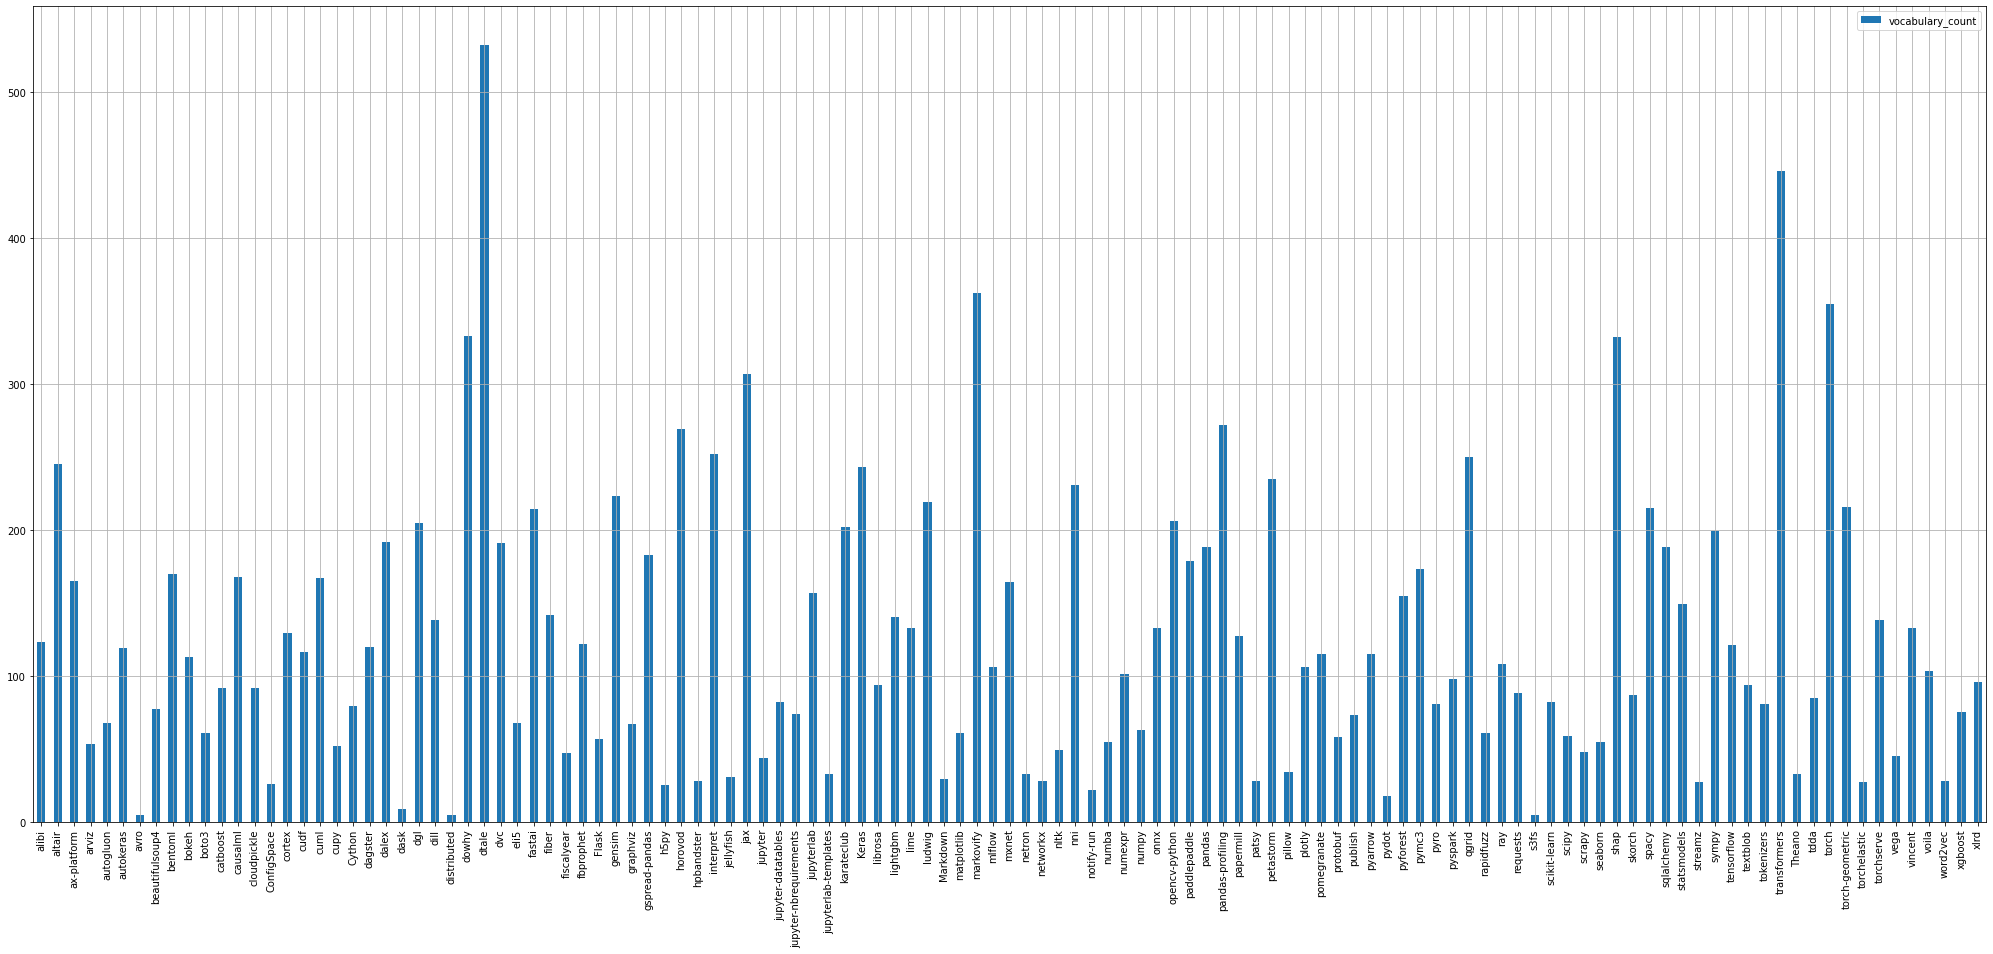

In [89]:
data_science_readmes_pd[['vocabulary_count']].plot.bar(figsize=(35,15), grid=True);

In [90]:
corpus_vocabulary = []
# Visualize vocabulary and distribution in each package
for package_name, vocabulary in vocabulary_package.items():
    for word in vocabulary:
        if word not in corpus_vocabulary:
            corpus_vocabulary.append(word)

print(f"corpus_vocabulary is {len(corpus_vocabulary)}")

corpus_vocabulary is 3498


In [95]:
for word in sorted(corpus_vocabulary):
    corpus_word = []
    for package_name, vocabulary in vocabulary_package.items():
        if word in vocabulary:
            corpus_word.append(True)
        else:
            corpus_word.append(False)

    data_science_readmes_pd[word] = corpus_word

In [104]:
data_science_readmes_pd

,file_name,raw_text,sentences,tokens,vocabulary,vocabulary_count,abbreviate,abide,ability,able,...,yes,yield,yin,yum,zero,zine,zip,zone,zoo,zooming
alibi,SeldonIO/alibi/README.md,"<p align=""center"">\n <img src=""doc/source/_st...","[(<, p, align=""center, "", >, \n , <, img, src...","[logo, build, alibi, alibi, alibi, branch, mas...",False,123,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
altair,altair-viz/altair/README.md,"# Altair <a href=""https://altair-viz.github.io...","[(#, Altair, <, a, href=""https://altair, -, vi...","[logo, build, viz, viz, viz, build, viz, style...",False,245,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ax-platform,facebook/Ax/README.md,"<img width=""300"" src=""website/static/img/ax_lo...","[(<, img, width=""300, "", src=""website, /, stat...","[static, logo, build, ax, ax, build, ax, ax, b...",False,165,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
arviz,arviz-devs/arviz/README.md,"<img src=""https://arviz-devs.github.io/arviz/_...","[(<, img, src=""https://arviz, -, devs.github.i...","[azure, build, build, master, branch, master, ...",False,53,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
autogluon,awslabs/autogluon/README.md,"\n\n<div align=""left"">\n <img src=""https://us...","[(\n\n, <, div, align=""left, ""), (>, \n , <, ...","[div, toolkit, deep, learning, build, view, jo...",False,68,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vincent,wrobstory/vincent/README.md,# Status\n\n#### 2016-06-18 Update\n\nIf you a...,"[(#, Status, \n\n, #, #, #, #, 2016, -, 06, -,...","[update, interested, direct, support, fully, f...",False,133,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
voila,voila-dashboards/voila/README.md,# ![voila](docs/source/voila-logo.svg)\n\n[![D...,"[(#, !), ([, voila](docs, /, source, /, voila,...","[voila, voila, dashboard, voila, join, badge, ...",False,103,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
word2vec,danielfrg/word2vec/README.md,word2vec\n========\n\n[![travis-ci](https://ap...,"[(word2vec, \n), (=, =, =, =, =, =, =, =, \n\n...","[training, original, functionality, pure, inst...",False,28,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
xgboost,dmlc/xgboost/README.md,<img src=https://raw.githubusercontent.com/dml...,"[(<, img, src, =, https://raw.githubuserconten...","[master, logo, extreme, gradient, boost, build...",False,75,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
